In [1]:
# platform libraries
import openeo
from sentinelhub import (SHConfig, SentinelHubRequest, DataCollection, MimeType, CRS, BBox, bbox_to_dimensions, geometry)

# utility libraries
from datetime import date
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import xarray as xr

In [2]:
config = SHConfig()
config.sh_client_id = %env SH_CLIENT_ID
config.sh_client_secret = %env SH_CLIENT_SECRET

In [3]:
conn = openeo.connect('https://jjdxlu8vwl.execute-api.eu-central-1.amazonaws.com/production')

In [4]:
conn = conn.authenticate_basic(username=config.sh_client_id, password=config.sh_client_secret)

In [5]:
conn.describe_account()

{'default_plan': 'trial',
 'info': {'sh_userinfo': {'aid': '6b7352f9-4e44-441e-bd49-8bb90fa11666',
   'aud': '7ac1cb4a-96d3-4fd2-832b-18e661cca4ad',
   'd': {'1': {'ra': {'rag': 1}, 't': 11000}},
   'did': 1,
   'email': 'peterjames.zellner@eurac.edu',
   'exp': 1687431932,
   'jti': '985fa1be-bf3f-44b3-976e-4481f48366da',
   'name': 'peterjames.zellner@eurac.edu',
   'sid': '9aa5c460-2ef4-40d8-91cd-5ff849fb16e3',
   'sub': 'd1398ed5-11bf-4bbb-9274-65c8d0136821'}},
 'name': 'peterjames.zellner@eurac.edu',
 'user_id': 'd1398ed5-11bf-4bbb-9274-65c8d0136821'}

In [2]:
env

{'SHELL': '/bin/bash',
 'NVIDIA_VISIBLE_DEVICES': 'all',
 'KUBERNETES_SERVICE_PORT_HTTPS': '443',
 'OPENEO_WEB_EDITOR_SERVICE_PORT_HTTP': '80',
 'JUPYTERHUB_ADMIN_ACCESS': '1',
 'KUBERNETES_SERVICE_PORT': '443',
 'NBVIEWER_PORT_8080_TCP': 'tcp://172.20.175.115:8080',
 'CONDA_MKL_INTERFACE_LAYER_BACKUP': '',
 'CONDA_EXE': '/opt/conda/bin/conda',
 'NSS_WRAPPER_GROUP': '/tmp/group',
 '_CE_M': '',
 'NOTEBOOK_VIEW_PORT_80_TCP_PROTO': 'tcp',
 'HOSTNAME': 'jupyter-user-e7a42103-2dd949-2d451a-2daaa6-2dfd0868585f3e',
 'MAMBAFORGE_SHA256': '412b79330e90e49cf7e39a7b6f4752970fcdb8eb54b1a45cc91afe6777e8518c',
 'MAMBAFORGE_VERSION': '4.13.0-1',
 'JUPYTERHUB_API_TOKEN': '<hidden>',
 'NVIDIA_REQUIRE_CUDA': 'cuda>=11.7 brand=tesla,driver>=450,driver<451 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driv

In [5]:
collection      = 'SENTINEL2_L2A_SENTINELHUB'
#spatial_extent  = {'west':11.020833,'east':11.366667,'south':46.653599,'north':46.954167,'crs':4326}
#spatial_extent  = {'west':11.0,'east':11.1,'south':46.6,'north':46.7,'crs':4326}
spatial_extent  = {'west':11.08,'east':11.11,'south':46.77,'north':46.79,'crs':4326}
#temporal_extent = ["2018-02-01", "2018-06-30"]
temporal_extent = ["2018-02-01", "2018-02-15"]
#bands           = ['B03', 'B11', 'CLM'] # ['B02', 'B03', 'B04', 'CLM']
bands           = ['B03', 'B11'] # ['B02', 'B03', 'B04', 'CLM']

In [6]:
s2 = conn.load_collection(collection,
                          spatial_extent=spatial_extent, # put json here
                          bands=bands,
                          temporal_extent=temporal_extent)

In [7]:
green = s2.band("B03")
swir = s2.band("B11")
#green = s2.filter_bands("B03")
#swir = s2.filter_bands("B11")

ndsi = (green - swir) / (green + swir)
#ndsi = s2.filter_bands("B03", "B11").reduce_dimension(dimension="bands",reducer = )
ndsi
#why merge cubes?

In [8]:
#ndsi_mean = ndsi.reduce_dimension(dimension="t", reducer = mean)
ndsi_max = ndsi.max_time()
ndsi_max

In [9]:
ndsi_max.download("ndsi_max.tiff")

In [ ]:
# OpenEoApiError: [400] ProcessGraphComplexity: The process is too complex for synchronous processing. Please use a batch job instead. estimated size of generated output of 34754520 bytes exceeds maximum supported size of 5000000 bytes.
# OpenEoApiError: [504] unknown: Endpoint request timed out

In [10]:
pth_res = "ndsi_max.tiff"
res = xr.open_rasterio(pth_res)
res

/tmp/ipykernel_190/1789586927.py:2: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  res = xr.open_rasterio(pth_res)


<xarray.DataArray (band: 1, y: 228, x: 223)>
[50844 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 46.79 46.79 46.79 46.79 ... 46.77 46.77 46.77 46.77
  * x        (x) float64 11.08 11.08 11.08 11.08 ... 11.11 11.11 11.11 11.11
Attributes:
    transform:               (0.00013452914798205991, 0.0, 11.08, 0.0, -8.771...
    crs:                     +init=epsg:4326
    res:                     (0.00013452914798205991, 8.771929824559659e-05)
    is_tiled:                0
    nodatavals:              (nan,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

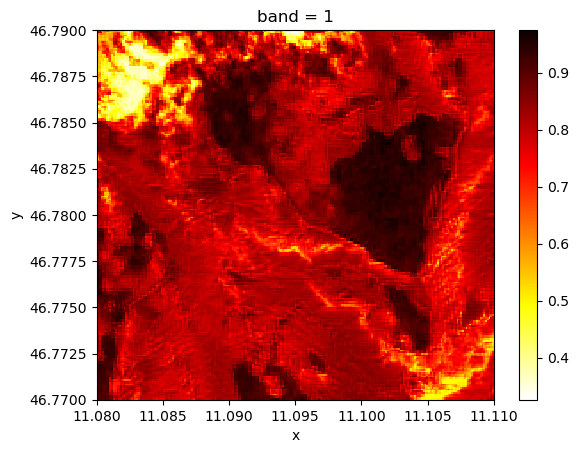

In [12]:
res.squeeze().plot.imshow(cmap="hot_r")

In [28]:
ndsi_max_fin = ndsi_max.save_result(format="GTiff")
#snowmap_fin.execute_batch()
ndsi_max_fin_job = ndsi_max_fin.create_job(title = "ndsi_max")
ndsi_max_fin_job.start_job()

OpenEoApiError: [500] Internal: Server error: Failed to download from:
https://services.sentinel-hub.com/api/v1/batch/process
with HTTPError:
403 Client Error: Forbidden for url: https://services.sentinel-hub.com/api/v1/batch/process
Server response: "{"status": 403, "reason": "Forbidden", "message": "You are not authorized to perform this action.", "code": "COMMON_INSUFFICIENT_PERMISSIONS"}"

In [ ]:
# OpenEoApiError: [500] Internal: Server error: Failed to download from:
# https://services.sentinel-hub.com/api/v1/batch/process
# with HTTPError:
# 403 Client Error: Forbidden for url: https://services.sentinel-hub.com/api/v1/batch/process
# Server response: "{"status": 403, "reason": "Forbidden", "message": "You are not authorized to perform this action.", "code": "COMMON_INSUFFICIENT_PERMISSIONS"}"